<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea_3/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D

**5.**   Resolver la siguiente integral con el método del trapecio:

$\int_{0}^{1}{e^{-x^2}}dx$

usando la condición que el error debe ser menor a 0.0005 en el cálculo (si el número de puntos (n) es decimal tomar el mayor entero)

In [ ]:
f = lambda x: np.exp(-x**2)
N = 200
x = np.linspace(0, 1, N+1)
y = f(x)

class Integrator:

  def __init__(self, x, f):

    self.x = x
    # Integration step
    self.h = self.x[1] - self.x[0]
    self.y = f(self.x)

    self.Integral = 0.

class Trapezoid(Integrator):

  def __init__(self,x,f):
    Integrator.__init__(self,x,f)

  def GetIntegral(self):

    self.Integral = 0.

    self.Integral += 0.5*( self.y[0]+self.y[-1] )

    self.Integral += np.sum( self.y[1:-1] )

    return self.Integral*self.h

  def GetError(self,f):
    d=(f( self.x + self.h) - 2*f(self.x) + f(self.x-self.h))/self.h**2

    max_= np.max(np.abs(d))

    self.error = (max_*(self.x[-1]-self.x[0])**3)/(12*(len(self.x)-1)**2)
    return self.error



Integrador1 = Trapezoid(x,f)

print(f"La integral es: {Integrador1.GetIntegral()} y el error es: {Integrador1.GetError(f)}")

La integral es: 0.7468225999801449 y el error es: 4.166614583763402e-06


**6.** Para  encontrar  la  inductancia  exacta  de  una  bobina  toroidal  es  necesario  calcular  la integral:
$\int_{a}^{b}\frac{\sqrt{a^2-x^2}}{R+x}dx=\pi(R^2-a^2)$
donde R=  0.5cm es  el  radio  al  centro  del  toriode  y a=  0.01cm es  el  radio  de  la sección transversal del toriode.  Estimar la integral con el método del trapecio y la regla de Simpson 1/3, con un error menor al 0.5%.  Realizar la integral es un verdadero reto analítico.


In [ ]:
R=0.5
a=0.01
x=sym.Symbol('x')
def f(x):
  if a**2-x**2 < 0:
    return 0
  else:
    return np.sqrt(a**2-x**2)/(R+x)

def trapecio (f,a,b,n):
    p=(b-a)/n
    suma=0.5*(f(a)+f(b))
    for i in range (1,n):
        suma=suma+f(a+i*p)
    return p*suma

def metodo_simpson(f,a,b,n):
    if n%2==1:
        n+=1
    else:
        print("n debe ser par")
    p=(b-a)/n
    suma=f(a)+f(b)
    for i in range(1, n, 2):
        suma += 4 * f(a + i * p)
    for i in range(2, n, 2):
        suma += 2 * f(a + i * p)

    return (p / 3) * suma

tolerancia=0.005
n = 10
max_iteraciones = 1000
resultado_exacto = np.pi * (R - np.sqrt(R**2 - a**2))

error_trapecio =1
error_simpson = 1
while (error_trapecio>tolerancia or error_simpson>tolerancia) and n<max_iteraciones:
    resultado_trapecio=trapecio(f,-a,a,n)
    resultado_simpson=metodo_simpson(f,-a,a,n)

    error_trapecio=abs(resultado_exacto-resultado_trapecio)
    error_simpson=abs(resultado_exacto-resultado_simpson)

    n+=2


print(f"Resultado Trapecio: {resultado_trapecio} con n = {n}")
print(f"Resultado Simpson: {resultado_simpson} con n = {n}")
print(f"Resultado Exacto: {resultado_exacto}")


Resultado Trapecio: 0.00030373233837885323 con n = 12
Resultado Simpson: 0.00031004702233502313 con n = 12
Resultado Exacto: 0.0003141906875702543


In [ ]:
R=0.5
a=0.01
x=sym.Symbol('x')
def f(x):
  if a**2-x**2 < 0:
    return 0
  else:
    return np.sqrt(a**2-x**2)/(R+x)

def trapecio (f,a,b,n):
    p=(b-a)/n
    suma=0.5*(f(a)+f(b))
    for i in range (1,n):
        suma=suma+f(a+i*p)
    return p*suma

def metodo_simpson(f,a,b,n):
    if n%2==1:
        n+=1
    else:
        print("n debe ser par")
    p=(b-a)/n
    suma=f(a)+f(b)
    for i in range(1, n, 2):
        suma += 4 * f(a + i * p)
    for i in range(2, n, 2):
        suma += 2 * f(a + i * p)

    return (p / 3) * suma

tolerancia=0.005
n = 10
max_iteraciones = 1000
resultado_exacto = np.pi * (R - np.sqrt(R**2 - a**2))

def segunda_derivada (f,x, h=1e-5):
    return (f(x+h)-2*f(x)+f(x-h))/h**2
def cuarta_derivada (f,x, h=1e-5):
    return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/h**4


def error_trapecio(f,a,b,n):
    max_fun=max(segunda_derivada(f,x) for x in np.linspace(a,b, 100))
    return abs(-((b-a)**3)/(12*n**2)*max_fun)

def error_simpson(f,a,b,n):
    max_fun=max(cuarta_derivada(f,x) for x in np.linspace (a,b,100))
    return -((b-a)**5*max_fun)/(180*n**4)

a_limit = -a
b_limit = a

n = 10
integral_trapecio = trapecio(f, a_limit, b_limit, n)
integral_simpson = metodo_simpson(f, a_limit, b_limit, n)

error_trap = error_trapecio(f, a_limit, b_limit, n)
error_simp = error_simpson(f, a_limit, b_limit, n)

print(f"Integral por Trapecio: {integral_trapecio}, Error estimado: {error_trap}")
print(f"Integral por Simpson: {integral_simpson}, Error estimado: {error_simp}")

n debe ser par
Integral por Trapecio: 0.00030373233837885323, Error estimado: 0.06082893248738608
Integral por Simpson: 0.00031004702233502313, Error estimado: 1.0684663030878657e-08


**7.** Una forma de generalizar el método de integración del trapecio para una integral doble de una función f(x,y) consiste en dividir el plano xy en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio R=1 como sigue:

a) Cree una grilla entre -R y R en el plano xy, donde el número de cuadrados en cada lado de la grilla sea $n$. Es decir, la grilla tendría $n+1$ puntos en cada eje, y $n^2$ cuadrados pequeños

b) Para cada cuadrado pequeño calculo el promedio de la función de los cuatro vértices y multiplique por el área del cuadrado pequeño. Si el punto queda fuera de la esfera asuma que el valor de la función f(x,y) es cero.

Volumen de la semiesfera: 2.09384699833374


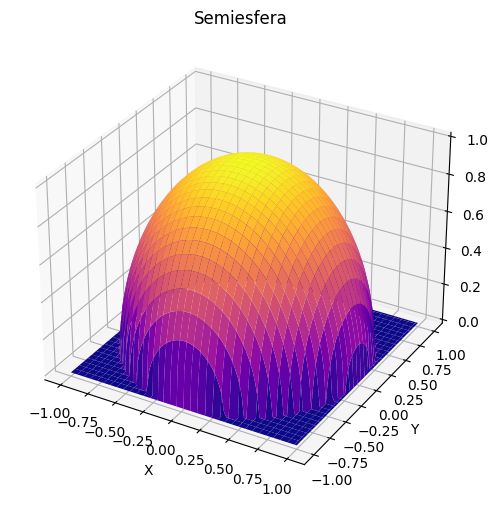

In [143]:
def f(x, y, R):
    z = np.sqrt(np.maximum(0, R**2 - x**2 - y**2))
    return z
n=100

R=1
x = np.linspace(-R, R, n+1)
y = np.linspace(-R, R, n+1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, R)
delta_x=x[1]-x[0]
delta_y=y[1]-y[0]
volumen=0
for i in range(n):
  for j in range(n):
    punto=Z[i,j]
    izq=Z[i+1,j]
    izq_a=Z[i+1,j+1]
    punto_a=Z[i,j+1]
    promedio=(izq+izq_a+punto+punto_a)/4
    volumen += promedio*delta_x*delta_y
volumen #El volumen de una semiesfera es 2pi/3
print("Volumen de la semiesfera:", volumen)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, edgecolor='none',cmap="plasma")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Semiesfera')

plt.show()

**9.** La regla de Simpson 3/8 consiste en aproximar el integrando por un polinomio interpolador de orden 3.

**a)**  Encontrar  las  funciones cardinales  de  dicha  interpolación  e  integrar  para  demostrar que:
$\int_{a}^{b} f(x)\cong\frac{3h}{8}[f(a)+3f(\frac{2a+b}{3})+2f(\frac{a+2b}{3})+f(b)]$
El número de puntos de la discretización debe ser múltiplo de tres.

Hint: Use la siguiente discretización ${0,h,2h,3h}$

In [ ]:
x, h=sym.symbols('x h')



#Discretización dada

f0=sym.symbols('f(0)')
f1=sym.symbols('f(h)')
f2=sym.symbols('f(2h)')
f3=sym.symbols('f(3h)')

puntos_interpolacion=np.array([0,h,2*h,3*h])

def bases(x, j,puntos_interpolacion):
    base=1
    for i in range(len(puntos_interpolacion)):
        if i!=j:
            base*=((x-puntos_interpolacion[i])/(puntos_interpolacion[j]-puntos_interpolacion[i]))
    return base

def polinomio_interpolacion(X, puntos_interpolacion):
    polinomio=0
    for i in range(len(puntos_interpolacion)):
        polinomio+=puntos_interpolacion[i]*bases(x,i,puntos_interpolacion)
    return polinomio

polinomio_interpolacion(x,puntos_interpolacion)



x*(-3*h + x)*(-2*h + x)/(2*h**2) - x*(-3*h + x)*(-h + x)/h**2 + x*(-2*h + x)*(-h + x)/(2*h**2)

In [ ]:
# Calcular e imprimir las funciones cardinales
L0 = bases(x, 0, puntos_interpolacion)
L1 = bases(x, 1, puntos_interpolacion)
L2 = bases(x, 2, puntos_interpolacion)
L3 = bases(x, 3, puntos_interpolacion)

# Integrar cada función cardinal en el intervalo [0, 3h]
integral_L0 = sym.integrate(L0, (x, 0, 3*h))
integral_L1 = sym.integrate(L1, (x, 0, 3*h))
integral_L2 = sym.integrate(L2, (x, 0, 3*h))
integral_L3 = sym.integrate(L3, (x, 0, 3*h))

print("\nIntegrales de las funciones cardinales:")
print("∫ L0(x) dx =", integral_L0)
print("∫ L1(x) dx =", integral_L1)
print("∫ L2(x) dx =", integral_L2)
print("∫ L3(x) dx =", integral_L3)


resultado = integral_L0 * sym.symbols('f(0)') + integral_L1 * sym.symbols('f(h)') + integral_L2 * sym.symbols('f(2h)') + integral_L3 * sym.symbols('f(3h)')
print("\nResultado de la integral ponderada de las funciones cardinales:")
resultado.simplify()


Integrales de las funciones cardinales:
∫ L0(x) dx = 3*h/8
∫ L1(x) dx = 9*h/8
∫ L2(x) dx = 9*h/8
∫ L3(x) dx = 3*h/8

Resultado de la integral ponderada de las funciones cardinales:


3*h*(f(0) + 3*f(2h) + f(3h) + 3*f(h))/8

**b**   Dado  que h=   $\frac{(b−a)}{3}$,  muestre  que  los  puntos  intermedios  son $\frac{2a+b}{3}$ y $\frac{a+2b}{3}$ respectivamente

In [ ]:
x, a, b = sym.symbols('x a b')
h=(b-a)/3
puntos_interpolacion = np.array([0, h, 2*h, 3*h])
puntos_reales = [a, a + h, a + 2*h, a + 3*h]

punto_intermedio_1 = a + h
punto_intermedio_2 = a + 2*h

In [ ]:
print("Punto intermedio 1 =")
punto_intermedio_1.simplify()

Punto intermedio 1 =


2*a/3 + b/3

In [ ]:
print("Punto intermedio 2 =")
punto_intermedio_2.simplify()

Punto intermedio 2 =


a/3 + 2*b/3

**10.** Muestre que el error asociado a la regla de Simpson 3/8 simple está dado por:

$E=\frac{f^{(4)}(ξ)}{4!}\int_{a}^{b}(x-x_0)(x-x_1)(x-x_2)(x-x_3)dx=-\frac{3}{80}h^5f^{(4)}(ξ)$

*Hint:* Considere la siguiente integral:

$I=\int_{0}^{3h}(x)(x-h)(x-2h)(x-3h)dx$

In [ ]:
x=sym.Symbol('x')
h=sym.Symbol('h')
integrando = x * (x - h) * (x - 2*h) * (x - 3*h)

I = sym.integrate(integrando, (x, 0, 3*h))
f4 = sym.Symbol('f4(ξ)') # es la cuarta derivada
factor = f4 / sym.factorial(4)
E= factor*I

E

-3*f4(ξ)*h**5/80

**15** Dada la aproximaci ́on de cuadratura gausiana:
$\int_{-1}^{1}f(x)=\sum_{k=0}^{n}w_k \cdot f(x_k)$
donde $w_0,w_1,...w_n$ son los coeficientes ponderados ó pesos.

**a**  Halle los ceros de los primeros 20 polinomios de Legendre.

In [ ]:
def legendre(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        Pn_2 = 1  # P0(x)
        Pn_1 = x  # P1(x)
        for k in range(2, n + 1):
            Pn = ((2 * k - 1) * x * Pn_1 - (k - 1) * Pn_2) / k
            Pn_2 = Pn_1
            Pn_1 = Pn
        return Pn_1

x = sym.Symbol('x')
def GetNewtonMethod(f, df, xn, itmax=1000, precision=1e-16):
    error = 1
    it = 0
    while error > precision and it < itmax:
        try:
            xn1 = xn - f(xn) / df(xn)
            error = abs(f(xn) / df(xn))
        except ZeroDivisionError:
            print('Division by zero error')
            return None
        xn = xn1
        it += 1
    if it == itmax:
        return None
    else:
        return xn

def GetAllRoots(n_values, tolerancia=1e-12):
    Roots = np.array([])
    for n in n_values:
        poly = legendre(n, x)
        dpoly = sym.diff(poly, x)
        f = sym.lambdify(x, poly, "numpy")
        df = sym.lambdify(x, dpoly, "numpy")

        for i in np.linspace(-1, 1, n):
            root = GetNewtonMethod(f, df, i)
            if root is not None:
                croot = np.round(root, int(-np.log10(tolerancia)))
                if not np.any(np.isclose(Roots, croot, atol=tolerancia)):
                    Roots = np.append(Roots, croot)

    Roots.sort()
    return Roots

n_values = range(1,21)
roots = GetAllRoots(n_values)


for n in range(1,21):
    print(f'Raíces del polinomio de Legendre P_{n}(x):')
    roots_n = [r for r in roots if np.round(r, 100) in GetAllRoots([n])]
    print(roots_n)


Raíces del polinomio de Legendre P_1(x):
[0.0]
Raíces del polinomio de Legendre P_2(x):
[-0.57735026919, 0.57735026919]
Raíces del polinomio de Legendre P_3(x):
[-0.774596669241, 0.0, 0.774596669241]
Raíces del polinomio de Legendre P_4(x):
[-0.861136311594, -0.339981043585, 0.339981043585, 0.861136311594]
Raíces del polinomio de Legendre P_5(x):
[-0.538469310106, 0.0, 0.538469310106]
Raíces del polinomio de Legendre P_6(x):
[-0.932469514203, -0.661209386466, -0.238619186083, 0.238619186083, 0.661209386466, 0.932469514203]
Raíces del polinomio de Legendre P_7(x):
[-0.949107912343, -0.741531185599, -0.405845151377, 0.0, 0.405845151377, 0.741531185599, 0.949107912343]
Raíces del polinomio de Legendre P_8(x):
[-0.525532409916, -0.183434642496, 0.183434642496, 0.525532409916]
Raíces del polinomio de Legendre P_9(x):
[-0.968160239508, -0.836031107327, -0.324253423404, 0.0, 0.324253423404, 0.836031107327, 0.968160239508]
Raíces del polinomio de Legendre P_10(x):
[-0.865063366689, -0.14887433

KeyboardInterrupt: 

**b** Halle los pesos de ponderación para los primeros 20 polinomios de Legendre.


In [ ]:
def pesos_legendre(n):
    roots= GetAllRoots([n], tolerancia=1e-12)
    x = sym.Symbol('x')
    polinomio=legendre(n,x)
    dpolinomio=sym.diff(polinomio,x)

    f=sym.lambdify(x,polinomio,"numpy")
    df=sym.lambdify(x,dpolinomio,"numpy")
    pesos=[]
    for raiz in roots:
        peso=2/((1-raiz**2)*df(raiz)**2)
        pesos.append(peso)
    return np.array(pesos)

n_values = range(1, 5)
all_roots_and_weights = {}
for n in n_values:
        roots_n = GetAllRoots([n])
        weights_n = pesos_legendre(n)
        all_roots_and_weights[n] = (roots_n, weights_n)

for n, (roots_n, weights_n) in all_roots_and_weights.items():
        print(f'\nPolinomio de Legendre P_{n}(x):')
        #print(f'Raíces: {roots_n}')
        print(f'Pesos de ponderación: {weights_n}')


Polinomio de Legendre P_1(x):
Pesos de ponderación: [2.]

Polinomio de Legendre P_2(x):
Pesos de ponderación: [1. 1.]

Polinomio de Legendre P_3(x):
Pesos de ponderación: [0.55555556 0.88888889 0.55555556]

Polinomio de Legendre P_4(x):
Pesos de ponderación: [0.34785485 0.65214515 0.65214515 0.34785485]


**16.** Estime la siguiente integral usando el método de cuadratura de Gauss-Legendre:          $\int_{0}^{∞}\frac{1}{x^4 + 1} ≈ 1.110721$

Hint: Dividir la integral para tener dos integrales con límites [-1,1] y [0,1].

In [ ]:
"""
Con cuadratura Gauss-Laguerre
f=lambda x: np.exp(x)/(x**4+1)
def integral(n):
    Raices, Pesos = np.polynomial.laguerre.laggauss(n)
    Integral=np.sum(Pesos*f(Raices))
    return Integral
print(f"La integral aproximada es: {integral(3)}")

Con sympy:
x = sym.Symbol('x')

funcion1 = 1 / (x**4 + 1)

resultado = sym.integrate(funcion1, (x, 0, sym.oo))
resultado.simplify()

sqrt(2)*pi /4
"""

'\nCon cuadratura Gauss-Laguerre\nf=lambda x: np.exp(x)/(x**4+1)\ndef integral(n):\n    Raices, Pesos = np.polynomial.laguerre.laggauss(n)\n    Integral=np.sum(Pesos*f(Raices))\n    return Integral\nprint(f"La integral aproximada es: {integral(3)}")\n\n'

In [144]:
#Gauss-Legendre
funcion1=lambda x: 1/(x**4 +1)
funcion2=lambda t: (1/(t**2 +(1/t**2)))
a=0
b=1
n=20
def GaussLegendre(a,b,f1,f2,n):
  Raices, pesos=np.polynomial.legendre.leggauss(n)
  t_ = 0.5*((b-a)*Raices+b+a)
  I1= 0.5 * (b-a) * np.sum(pesos*f1(t_))
  I2= 0.5*(b-a)*np.sum(pesos*f2(t_))
  I=I1+I2
  return I
print(f"La integral por el método de cuadratura de Gauss-Legendre es: {GaussLegendre(a,b,funcion1,funcion2,n)}")

La integral por el método de cuadratura de Gauss-Legendre es: 1.1107207345395915


**17**   In the black-body radiation problem the following integral appears:

$\int_{0}^{∞} \frac{x^3}{e^x-1}dx=\frac{π^4}{15}$

**a** Compute this integral using the Gauss-Laguerre quadrature method for n=3 evaluation points.

In [ ]:
f=lambda x: x**3/(1-np.exp(-x))

def integral(n):
    Raices, Pesos = np.polynomial.laguerre.laggauss(n)
    Integral=np.sum(Pesos*f(Raices))
    return Integral
Exacta=np.pi**4/15

print(f"La integral exacta es: {Exacta}")
print(f"La integral aproximada es: {integral(3)}")


La integral exacta es: 6.493939402266828
La integral aproximada es: 6.481130171540027


**b**  For this estimation, plot the relative error $(ε_r(n) =I_{estimated}(n)/I_{exact})$ as a function of the evaluation points, with n= [2,3,...,10]


Los errores son: [0.9876481858267346, 0.9980275099699375, 1.0000918144594322, 1.0000575865435264, 1.0000003098357197, 0.9999968444489089, 0.9999994245535897, 1.0000001234701794, 1.0000000870635282]


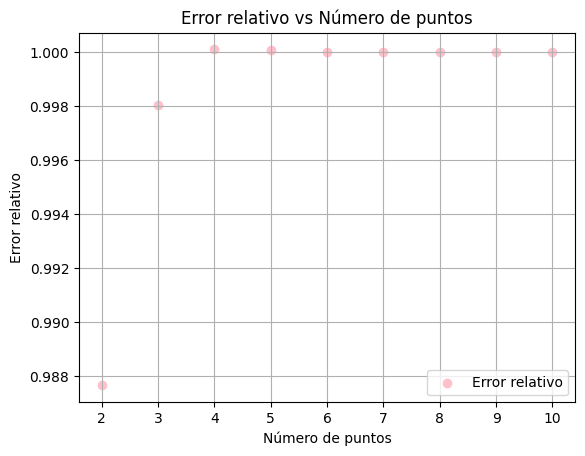

In [ ]:
import matplotlib.pyplot as plt
def error (n):
    return np.abs((integral(n))/Exacta)
errores=[]
n = np.arange(2,11)
for i in n:
    errores.append(error(i))
print(f"Los errores son: {errores}")

plt.scatter(n,errores, color="pink", marker="o", label='Error relativo')
plt.xlabel("Número de puntos")
plt.grid(True)
plt.ylabel("Error relativo")
plt.legend(loc="lower right")
plt.title("Error relativo vs Número de puntos")
plt.show()


**21**
**.b** Implemente la funcion $sgn(x)$.

In [ ]:
def sgn(x):
    if x<0:
        return -1
    elif x==0:
        return 0
    else:
        return 1

**c.**  Vectorice y dibuje la función.

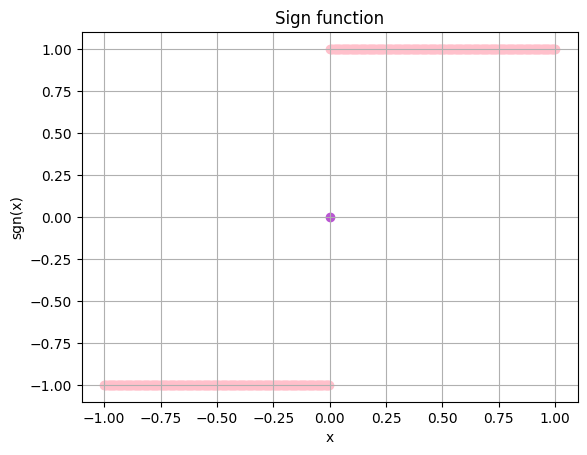

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

x=np.linspace(-1,1,400)
y=np.vectorize(sgn)(x)
plt.grid(True)
plt.scatter(x,y, color='pink')
plt.scatter(0,0, color='mediumorchid')
plt.xlabel('x')
plt.ylabel('sgn(x)')
plt.title('Sign function')
plt.show()

**d.**  Defina los puntos y los pesos de Gauss-Legendre al grado n= 15.

In [ ]:
Raices, pesos=np.polynomial.legendre.leggauss(15)
print(Raices)
print(pesos)

[-0.98799252 -0.93727339 -0.84820658 -0.72441773 -0.57097217 -0.39415135
 -0.20119409  0.          0.20119409  0.39415135  0.57097217  0.72441773
  0.84820658  0.93727339  0.98799252]
[0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]


**e** Cree y guarde los polinomios de Legendre al grado N= 20.

In [ ]:
import numpy as np
import sympy as sym

x = sym.Symbol('x',Real=True)
y = sym.Symbol('y',Real=True)

def GetLegendre(n):
  y = (x**2 - 1)**n

  p = sym.diff(y,x,n)/(2**n * sym.factorial(n))

  return p


Legendre = []
DLegendre = []
n=20

for i in range(n+1):

    poly = GetLegendre(i)
    Legendre.append(poly)
    DLegendre.append(sym.diff(poly,x))
valores_x=np.linspace(-1,1,400)
y=np.vectorize(sgn)(valores_x)
poly.simplify()

34461632205*x**20/262144 - 83945001525*x**18/131072 + 347123925225*x**16/262144 - 49589132175*x**14/32768 + 136745788725*x**12/131072 - 29113619535*x**10/65536 + 15058768725*x**8/131072 - 557732175*x**6/32768 + 334639305*x**4/262144 - 4849845*x**2/131072 + 46189/262144

**f.** Cree una función que calcule los N+ 1 coeficientes en un array de numpy.

In [ ]:
def obtener_coeficientes(f, n, Raices, pesos):
    coeficientes = np.zeros(n + 1)
    for i in range(n + 1):
        valores_del_pol = np.polynomial.legendre.legval(Raices, [0]*i + [1])
        coeficientes[i] = (2 * i + 1) / 2 * np.sum(pesos * f(Raices) * valores_del_pol)
    return coeficientes
coeficientes =obtener_coeficientes(np.vectorize(sgn), 20, Raices, pesos)
coeficientes

array([ 6.93889390e-17,  1.48971231e+00,  1.73472348e-17, -8.38742583e-01,
        0.00000000e+00,  6.15369232e-01,  6.76542156e-17, -4.68994560e-01,
        2.94902991e-17,  3.48540946e-01,  0.00000000e+00, -2.36219080e-01,
        2.16840434e-17,  1.22517145e-01,  0.00000000e+00, -3.26697443e-15,
       -5.00901404e-17, -1.39529963e-01,  4.81385765e-17,  3.07786739e-01,
       -3.55618313e-17])

**g.** Calcule la combinación lineal para cada valor del dominio que uso para dibujar la función original.


In [ ]:
def combinacion_lineal(x, coeficientes, N):
    f_aprox = np.zeros_like(x)
    for n in range(N + 1):
        # Evaluar el polinomio de Legendre en los puntos x
        Pn_values = np.polynomial.legendre.legval(x, [0]*n + [1])
        # Sumar los coeficientes ponderados por los polinomios
        f_aprox += coeficientes[n] * Pn_values
    return f_aprox
f_aprox=combinacion_lineal(np.linspace(-1, 1, 1001), coeficientes, 20)
f_aprox

array([-1.20044018, -1.12646418, -1.06691273, ...,  1.06691273,
        1.12646418,  1.20044018])

**h.** Dibuje la representación en la base de Legendre para obtener la  aproximación de la función sgn(x) mediante la base de Legendre con grado n= 20.

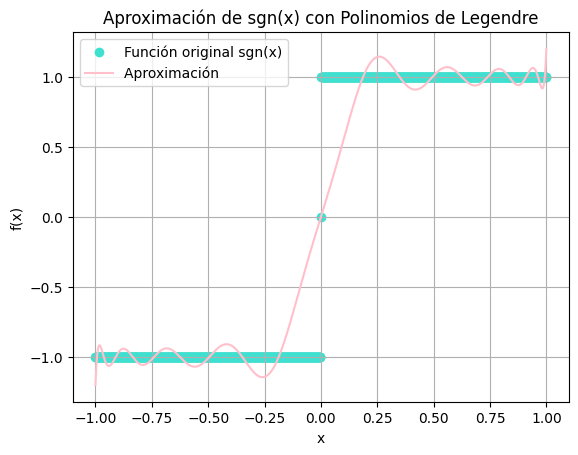

In [ ]:
plt.scatter(np.linspace(-1, 1, 1001), np.vectorize(sgn)(np.linspace(-1, 1, 1001)), label="Función original sgn(x)", color='turquoise')
plt.plot(np.linspace(-1, 1, 1001), f_aprox, label="Aproximación ", color='pink')
plt.title("Aproximación de sgn(x) con Polinomios de Legendre")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()